# Smart Maternal Risk Predictor


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier



In [61]:
data= pd.read_csv("Maternal_health.csv")

# checking if datset is loaded accurately or not

In [62]:
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [63]:
data.tail(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


# checking if any null data in each column

In [64]:
data.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


# checking data_type of each column

In [65]:
data.dtypes

,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [66]:
data['RiskLevel']


,RiskLevel
0,high risk
1,high risk
2,high risk
3,high risk
4,low risk
...,...
1009,high risk
1010,high risk
1011,high risk
1012,high risk


# using describe() to see more detail of the dataset

In [67]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [68]:
#names of all the columns
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

**"Data Preprocessing"**


# converting the target column into 3 numeric category i.e low risk=0, mid risk=1 and high risk=2



In [69]:
data['RiskLevel']=data['RiskLevel'].map({'low risk':0, 'mid risk':1, 'high risk':2})

data['RiskLevel']

,RiskLevel
0,2
1,2
2,2
3,2
4,0
...,...
1009,2
1010,2
1011,2
1012,2


# converting data in to feature and target

In [11]:
x=data.drop('RiskLevel', axis=1)
y=data['RiskLevel']

In [12]:
#printing the names of Faetures.
print("Name of the columns in the X dataset\n",x.columns)

Name of the columns in the X dataset
 Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')


In [13]:
#printing the names of Target column.
print("The Feature column\n",y.name)

The Feature column
 RiskLevel


 # splitting dataset into training data and testing data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=45)

In [15]:
print(f"Testing set shape: {x_test.shape}")

Testing set shape: (203, 6)


In [16]:
print(f"\nTraining set shape: {x_train.shape}")


Training set shape: (811, 6)


In [27]:
from collections import Counter
print(Counter(y_train))

Counter({0: 328, 1: 261, 2: 222})


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check new distribution
from collections import Counter
print(Counter(y_train_balanced))


Counter({0: 328, 1: 328, 2: 328})


# Standardizing the features

In [31]:
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler
# Standardizing the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#  RandomForestClassifier Model Training

In [51]:


# Model banayein
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train karein
model.fit(x_train, y_train)

# Predict karein
y_pred = model.predict(x_test)


In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8522167487684729


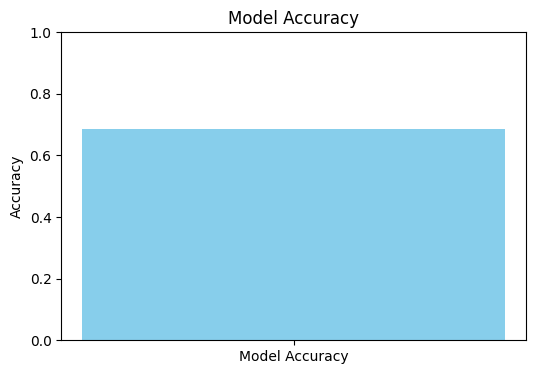

In [59]:
plt.figure(figsize=(6,4))
plt.bar(['Model Accuracy'], [accuracy], color='skyblue')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Confusion Matrix

Confusion Matrix:
 [[64 12  2]
 [ 5 62  8]
 [ 2  1 47]]


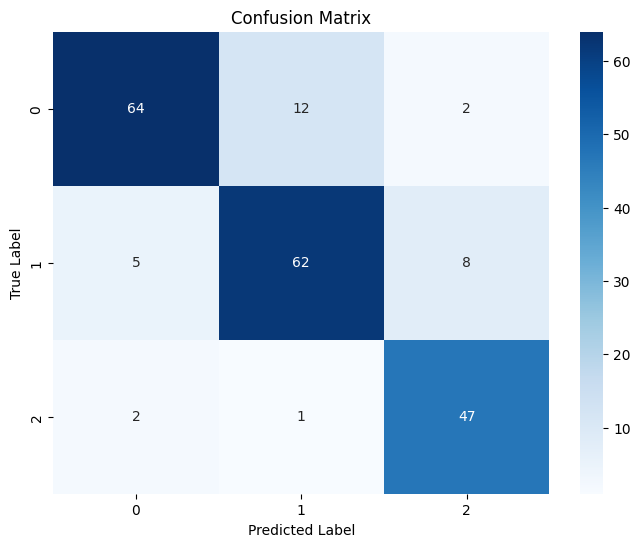

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report

{'0': {'precision': 0.9014084507042254, 'recall': 0.8205128205128205, 'f1-score': 0.8590604026845637, 'support': 78.0}, '1': {'precision': 0.8266666666666667, 'recall': 0.8266666666666667, 'f1-score': 0.8266666666666667, 'support': 75.0}, '2': {'precision': 0.8245614035087719, 'recall': 0.94, 'f1-score': 0.8785046728971962, 'support': 50.0}, 'accuracy': 0.8522167487684729, 'macro avg': {'precision': 0.8508788402932214, 'recall': 0.8623931623931623, 'f1-score': 0.8547439140828089, 'support': 203.0}, 'weighted avg': {'precision': 0.8548666469476266, 'recall': 0.8522167487684729, 'f1-score': 0.851881502730324, 'support': 203.0}}


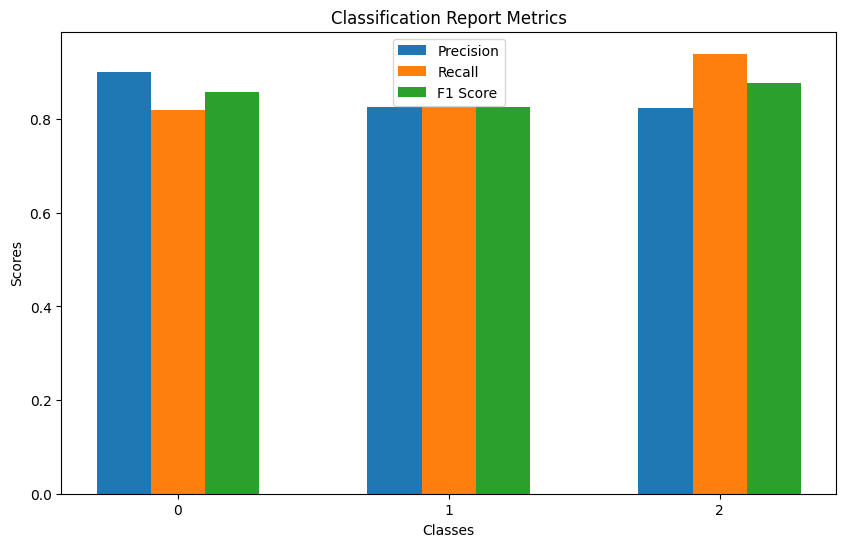

In [57]:
class_report = classification_report(y_test, y_pred, output_dict=True)
print(class_report)

labels = list(class_report.keys())[:-3]

precision = [class_report[label]['precision'] for label in labels]
recall = [class_report[label]['recall'] for label in labels]
f1_score = [class_report[label]['f1-score'] for label in labels]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.2 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.4 for i in x], f1_score, width=0.2, label='F1 Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()
